In [1]:
import pandas as pd
import numpy as np
import spacy

In [2]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [3]:
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/laxmimerit/twitter-data/101ebe28367c65359a61b9f54ac446932cc401d9/twitter4000.csv")

In [5]:
df

,twitts,sentiment
0,is bored and wants to watch a movie any sugge...,0
1,back in miami. waiting to unboard ship,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0
3,ughhh i am so tired blahhhhhhhhh,0
4,@mandagoforth me bad! It's funny though. Zacha...,0
...,...,...
3995,i just graduated,1
3996,Templating works; it all has to be done,1
3997,mommy just brought me starbucks,1
3998,@omarepps watching you on a House re-run...lov...,1


In [6]:
df['sentiment'].value_counts() # 2000 positive & # 2000 negative 
                                

sentiment
0    2000
1    2000
Name: count, dtype: int64

# word counts

In [7]:
len("this is text".split())

3

In [8]:
df['word_counts'] = df['twitts'].apply(lambda x: len(str(x).split()))

In [9]:
df

,twitts,sentiment,word_counts
0,is bored and wants to watch a movie any sugge...,0,10
1,back in miami. waiting to unboard ship,0,7
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12
3,ughhh i am so tired blahhhhhhhhh,0,6
4,@mandagoforth me bad! It's funny though. Zacha...,0,26
...,...,...,...
3995,i just graduated,1,3
3996,Templating works; it all has to be done,1,8
3997,mommy just brought me starbucks,1,5
3998,@omarepps watching you on a House re-run...lov...,1,8


In [10]:
df.sample(5)

,twitts,sentiment,word_counts
1034,@onelewis ive go this unfortunate thing called...,0,8
2081,@Redwense hi mikey!,1,3
1446,i'm missing my wife at the MTV Movie Awards!! ...,0,19
2918,@Dutchrudder nice picliked others as well.yes ...,1,11
3288,is awake and getting dressed for chapa chicken,1,8


In [11]:
df.head(10)

,twitts,sentiment,word_counts
0,is bored and wants to watch a movie any sugge...,0,10
1,back in miami. waiting to unboard ship,0,7
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12
3,ughhh i am so tired blahhhhhhhhh,0,6
4,@mandagoforth me bad! It's funny though. Zacha...,0,26
5,"brr, i'm so cold. at the moment doing my assig...",0,17
6,@kevinmarquis haha yep but i really need to sl...,0,22
7,eating some ice-cream while I try to see @pete...,0,14
8,@phatty84 just hella bored at work lol,0,7
9,Food poisoning blowssss,0,3


In [12]:
df['word_counts'].max()

32

In [13]:
df['word_counts'].min()

1

In [14]:
df[df['word_counts'] == 1]

,twitts,sentiment,word_counts
385,homework,0,1
691,@ekrelly,0,1
1124,disappointed,0,1
1286,@officialmgnfox,0,1
1325,headache,0,1
1897,@MCRmuffin,0,1
2542,Graduated!,1,1
2947,reading,1,1
3176,@omeirdeleon,1,1
3470,www.myspace.com/myfinalthought,1,1


# Characters count

In [15]:
len("this is")

7

In [16]:
def char_counts(x):
    s = x.split()
    x = ''.join(s)
    return len(x)

In [17]:
char_counts('this is ')

6

In [18]:
df['char_counts'] = df['twitts'].apply(lambda x:char_counts(str(x)))

In [19]:
df

,twitts,sentiment,word_counts,char_counts
0,is bored and wants to watch a movie any sugge...,0,10,43
1,back in miami. waiting to unboard ship,0,7,32
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12,54
3,ughhh i am so tired blahhhhhhhhh,0,6,27
4,@mandagoforth me bad! It's funny though. Zacha...,0,26,116
...,...,...,...,...
3995,i just graduated,1,3,14
3996,Templating works; it all has to be done,1,8,32
3997,mommy just brought me starbucks,1,5,27
3998,@omarepps watching you on a House re-run...lov...,1,8,45


In [20]:
df.sample(10)

,twitts,sentiment,word_counts,char_counts
2476,@funkycarla8 hi hun when your friend sends pic...,1,25,108
3519,@court0605 no just a response!,1,5,26
181,@charades oh man sounds like work is not fun f...,0,11,42
2816,Having a get together today...if you are comin...,1,13,64
2395,@aplusk where did you get that? it sounds good,1,9,38
1220,i hate it when my bff is groundedd boooooooooo,0,9,38
3088,"@sklemp Well, we've only been using it for a d...",1,24,106
177,"My cat snuck out, and is stalking somewhere ar...",0,20,79
591,just thought about how unfair 3 ppl have been ...,0,16,67
823,tiredd facebook then bed.,0,4,22


# Average word length

##### what is the average number of characters per word in the particular sentence

In [21]:
x = 'this is' #6/2 = 3
y = 'good to see you buddy ' #17/5=3.4

In [22]:
df['Average_word_length'] = df['char_counts']/df['word_counts']

In [23]:
df

,twitts,sentiment,word_counts,char_counts,Average_word_length
0,is bored and wants to watch a movie any sugge...,0,10,43,4.300000
1,back in miami. waiting to unboard ship,0,7,32,4.571429
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12,54,4.500000
3,ughhh i am so tired blahhhhhhhhh,0,6,27,4.500000
4,@mandagoforth me bad! It's funny though. Zacha...,0,26,116,4.461538
...,...,...,...,...,...
3995,i just graduated,1,3,14,4.666667
3996,Templating works; it all has to be done,1,8,32,4.000000
3997,mommy just brought me starbucks,1,5,27,5.400000
3998,@omarepps watching you on a House re-run...lov...,1,8,45,5.625000


In [24]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,Average_word_length
1118,ohh and missing all my brownheads,0,6,28,4.666667
3726,_sleep. way to go boys.,1,5,19,3.800000
1262,@nicholas1991 i miss you haha i think selena ...,0,15,72,4.800000
1164,okie peeps im leavin d twitter buildin..see ya...,0,26,111,4.269231
3296,"Tweet Tweet, *boasts* I got my hands on Issue ...",1,26,102,3.923077


###### # stopwords -> words which occur very frequently in the sentences

In [25]:
print(stopwords) 

{'thereafter', 'was', 're', '’re', 'her', 'myself', 'this', 'therefore', 'ourselves', '’m', 'less', 'whenever', 'its', 'had', '‘ve', 'almost', 'must', 'various', 'next', 'once', 'used', 'hers', 'via', 'anyhow', 'both', 'yourselves', 'after', 'whereas', 'again', 'two', 'least', 'beforehand', 'former', 'would', 'others', 'me', 'anyone', 'mine', 'during', 'under', 'at', 'whole', 'six', 'say', 'side', 'those', 'wherein', 'who', 'few', 'quite', 'his', 'call', 'done', 'though', 'out', 'themselves', 'an', 'why', 'every', 'have', 'whom', 'our', 'give', 'until', 'upon', 'show', 'yours', 'one', 'will', 'thereby', '‘ll', 'first', 'no', 'although', 'nothing', 'it', 'last', 'hereafter', 'thru', 'within', 'whereby', "n't", 'whether', 'you', 'whatever', '’d', 'too', 'empty', 'only', "'re", 'nine', 'rather', 'thereupon', 'how', 'we', 'noone', 'among', 'anyway', 'across', 'be', 'anything', 'were', 'because', 'between', 'thence', '’s', 'amount', 'yourself', 'before', 'herein', 'still', 'meanwhile', 'whe

In [26]:
len(stopwords)

326

###### -->   we need to remove stopwords because in the corpus we have around the 30,40%,30% of the data is the stopwords
 

###### -->  ultimately these stopwords increases the dictionary size

In [27]:
x = 'this is the text data'

In [28]:
x.split()

['this', 'is', 'the', 'text', 'data']

In [29]:
[t for t in x.split() if t in stopwords]

['this', 'is', 'the']

In [30]:
len([t for t in x.split() if t in stopwords])

3

In [31]:
df['stop_words_len'] = df['twitts'].apply(lambda x:len([t for t in x.split() if t in stopwords]))

In [32]:
df

,twitts,sentiment,word_counts,char_counts,Average_word_length,stop_words_len
0,is bored and wants to watch a movie any sugge...,0,10,43,4.300000,5
1,back in miami. waiting to unboard ship,0,7,32,4.571429,3
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12,54,4.500000,0
3,ughhh i am so tired blahhhhhhhhh,0,6,27,4.500000,3
4,@mandagoforth me bad! It's funny though. Zacha...,0,26,116,4.461538,13
...,...,...,...,...,...,...
3995,i just graduated,1,3,14,4.666667,2
3996,Templating works; it all has to be done,1,8,32,4.000000,6
3997,mommy just brought me starbucks,1,5,27,5.400000,2
3998,@omarepps watching you on a House re-run...lov...,1,8,45,5.625000,3


In [33]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,Average_word_length,stop_words_len
3369,Question: should I stay with red hair or get r...,1,20,85,4.250000,9
118,i'm waiting for my girl to get bk as she fly's...,0,22,70,3.181818,12
1723,Somehow found myself stuck in the 80's with a ...,0,17,68,4.000000,7
3542,"@Mylanta yeah, i'm with ya.....it flew over my...",1,12,53,4.416667,6
2906,@tysonritteraar Hey Ty Do you know about the ...,1,25,106,4.240000,10


# count #Hashtags and @Mentions

In [34]:
x = 'this is #hastag and this is @mention'
x.split()

['this', 'is', '#hastag', 'and', 'this', 'is', '@mention']

In [35]:
[t for t in x.split() if t.startswith('@')]

['@mention']

In [36]:
len([t for t in x.split() if t.startswith('@')])

1

In [37]:
df['hashtags_count'] = df['twitts'].apply(lambda x:len([t for t in x.split() if t.startswith('@')]))

In [38]:
df

,twitts,sentiment,word_counts,char_counts,Average_word_length,stop_words_len,hashtags_count
0,is bored and wants to watch a movie any sugge...,0,10,43,4.300000,5,0
1,back in miami. waiting to unboard ship,0,7,32,4.571429,3,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12,54,4.500000,0,1
3,ughhh i am so tired blahhhhhhhhh,0,6,27,4.500000,3,0
4,@mandagoforth me bad! It's funny though. Zacha...,0,26,116,4.461538,13,2
...,...,...,...,...,...,...,...
3995,i just graduated,1,3,14,4.666667,2,0
3996,Templating works; it all has to be done,1,8,32,4.000000,6,0
3997,mommy just brought me starbucks,1,5,27,5.400000,2,0
3998,@omarepps watching you on a House re-run...lov...,1,8,45,5.625000,3,1


In [39]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,Average_word_length,stop_words_len,hashtags_count
3303,@funky_town Yup,1,2,14,7.000000,0,1
1570,does laying down make athsma worse or somethin...,0,18,84,4.666667,11,0
2218,Me and my dad finally got the little kiddy poo...,1,21,80,3.809524,8,0
3103,"Very sore and staring at my bed, but oh no... ...",1,20,85,4.250000,7,0
2910,@Kimbalicious aww at least you can see it on g...,1,11,46,4.181818,7,1


# if numeric digits are present in twitts

In [40]:
x = 'this is 1 and 2 and 3'

In [41]:
x.split()

['this', 'is', '1', 'and', '2', 'and', '3']

In [42]:
x.split()[4].isdigit()

True

In [43]:
[t for t in x.split() if t.isdigit()]

['1', '2', '3']

In [44]:
df['numerics_count']=df['twitts'].apply(lambda x:len([t for t in x.split() if t.isdigit()]))

In [45]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,Average_word_length,stop_words_len,hashtags_count,numerics_count
1638,so stressed out right now,0,5,21,4.200000,3,0,0
1704,Mondays often mean back to work. Sigh. http:/...,0,8,56,7.000000,3,0,0
2582,@20ishtraveler Today's the big day! you've alr...,1,20,112,5.600000,6,1,0
3421,@mszjazebelle we were both rite the lil one w...,1,11,51,4.636364,6,1,0
2628,"@toitokyo Ok, then what happens?",1,5,28,5.600000,2,1,0


# UPPER case words count

In [46]:
x = 'I AM HAPPY TO LEARN '
y = "it's cool to learn nlp"

In [47]:
[t for t in x.split() if t.isupper()]

['I', 'AM', 'HAPPY', 'TO', 'LEARN']

In [48]:
[t for t in y.split() if t.isupper()]

[]

In [49]:
df['upper_counts'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isupper() ]))

In [50]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,Average_word_length,stop_words_len,hashtags_count,numerics_count,upper_counts
2532,@Hatz94 Daniel! Regina Spektor's New Album + ...,1,11,57,5.181818,0,1,0,0
2115,@JohnLloydTaylor aw. I'm glad you do. Where w...,1,13,57,4.384615,6,1,0,0
570,can't get into Mariah's new song.,0,6,28,4.666667,2,0,0,0
1962,ewww i hate history coursework,0,5,26,5.200000,1,0,0,0
1677,is not feeling to good,0,5,18,3.600000,3,0,0,0


In [51]:
x = 45.9
str(x).lower()

'45.9'

In [52]:
df['twitts'] = df['twitts'].apply(lambda x: str(x).lower())

In [53]:
df.sample(2)

,twitts,sentiment,word_counts,char_counts,Average_word_length,stop_words_len,hashtags_count,numerics_count,upper_counts
1507,my openoffice keeps freezing on me.,0,6,30,5.000000,1,0,0,0
3630,its a week today till we love sounds *nose bl...,1,26,113,4.346154,10,0,0,0


# contractions to expantions

In [54]:
contractions = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "could've": "could have",
    "couldn't": "could not",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'll": "he will",
    "he's": "he is",
    "how'd": "how did",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'll": "I will",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'll": "it will",
    "it's": "it is",
    "let's": "let us",
    "mustn't": "must not",
    "shan't": "shall not",
    "she'd": "she would",
    "she'll": "she will",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "that's": "that is",
    "there's": "there is",
    "they'd": "they would",
    "they'll": "they will",
    "they're": "they are",
    "they've": "they have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'll": "we will",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "where's": "where is",
    "who'd": "who would",
    "who'll": "who will",
    "who're": "who are",
    "who's": "who is",
    "who've": "who have",
    "won't": "will not",
    "would've": "would have",
    "wouldn't": "would not",
    "you'd": "you would",
    "you'll": "you will",
    "you're": "you are",
    "you've": "you have"
}


In [55]:
x = "i'm don't he'will"

In [56]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key,value)
        return x
    else:
        return x

In [57]:
cont_to_exp(x)

"i'm do not he'will"

In [58]:
%%timeit

 df['twitts'] = df['twitts'].apply(lambda x:cont_to_exp(x))

33.3 ms ± 3.07 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [59]:
df.sample(2)

,twitts,sentiment,word_counts,char_counts,Average_word_length,stop_words_len,hashtags_count,numerics_count,upper_counts
3888,@oflame stop makin me producherblush..lol! .....,1,21,112,5.333333,7,1,0,0
3104,woo demi's a trending topic :p that must feel ...,1,25,104,4.160000,11,0,0,0


# Count and Remove Emails

In [60]:
df['twitts']

0       is bored and wants to watch a movie  any sugge...
1                back in miami.  waiting to unboard ship 
2       @misskpey awwww dnt dis brng bak memoriessss, ...
3                       ughhh i am so tired  blahhhhhhhhh
4       @mandagoforth me bad! it is funny though. zach...
                              ...                        
3995                                    i just graduated 
3996            templating works; it all has to be done  
3997                     mommy just brought me starbucks 
3998    @omarepps watching you on a house re-run...lov...
3999    thanks for trying to make me smile i'll make y...
Name: twitts, Length: 4000, dtype: object

In [61]:
df[df['twitts'].str.contains('gmail.com')]

,twitts,sentiment,word_counts,char_counts,Average_word_length,stop_words_len,hashtags_count,numerics_count,upper_counts
2448,"when i click my firefox 'most visited' tab, af...",1,17,79,4.647059,5,0,0,1


In [62]:
df[df['twitts'].str.contains('hotmail.com')]

,twitts,sentiment,word_counts,char_counts,Average_word_length,stop_words_len,hashtags_count,numerics_count,upper_counts
3713,@securerecs arghh me please markbradbury_16@h...,1,5,51,10.2,0,1,0,0


In [63]:
df.shape

(4000, 9)

In [64]:
df.iloc[2448]['twitts']

"when i click my firefox 'most visited' tab, after my gmail comes 'twitter / over capacity' nice "

In [65]:
df.iloc[1]['twitts']

'back in miami.  waiting to unboard ship '

In [66]:
df.iloc[3713]['twitts']

'@securerecs arghh me please  markbradbury_16@hotmail.com'

In [67]:
import re

In [68]:
x = '@securerecs arghh me please  markbradbury_16@hotmail.com'


In [69]:
# re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)',x))

In [70]:
df['emails'] = df['twitts'].apply(lambda x: re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)',x)) 

In [71]:
df['email_count'] = df['emails'].apply(lambda x:len(x))

In [72]:
df[df['email_count'] >0]

,twitts,sentiment,word_counts,char_counts,Average_word_length,stop_words_len,hashtags_count,numerics_count,upper_counts,emails,email_count
3713,@securerecs arghh me please markbradbury_16@h...,1,5,51,10.2,0,1,0,0,[markbradbury_16@hotmail.com],1


In [73]:
re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)',"",x)

'@securerecs arghh me please  '

In [74]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)',"",x))

In [75]:
df

,twitts,sentiment,word_counts,char_counts,Average_word_length,stop_words_len,hashtags_count,numerics_count,upper_counts,emails,email_count
0,is bored and wants to watch a movie any sugge...,0,10,43,4.300000,5,0,0,0,[],0
1,back in miami. waiting to unboard ship,0,7,32,4.571429,3,0,0,0,[],0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12,54,4.500000,0,1,0,1,[],0
3,ughhh i am so tired blahhhhhhhhh,0,6,27,4.500000,3,0,0,0,[],0
4,@mandagoforth me bad! it is funny though. zach...,0,26,116,4.461538,13,2,0,0,[],0
...,...,...,...,...,...,...,...,...,...,...,...
3995,i just graduated,1,3,14,4.666667,2,0,0,0,[],0
3996,templating works; it all has to be done,1,8,32,4.000000,6,0,0,0,[],0
3997,mommy just brought me starbucks,1,5,27,5.400000,2,0,0,0,[],0
3998,@omarepps watching you on a house re-run...lov...,1,8,45,5.625000,3,1,0,0,[],0


# Count URLS and Remove it

In [76]:
import re

def extract_urls(text):
    url_pattern = r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+"

    urls = re.findall(url_pattern, text)
    return urls

sample_text = "Here are some URLs: http://example.com, https://www.google.com, and https://github.com."

extracted_urls = extract_urls(sample_text)

print("Extracted URLs:")
for url in extracted_urls:
    print(url)


Extracted URLs:
http://example.com,
https://www.google.com,
https://github.com.


In [77]:
x  = "Here are some URLs: http://example.com, https://www.google.com, and https://github.com."

In [78]:
#ssh://git@git.com>username/repo.git=riif?/

In [79]:
re.findall(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?',x)

[('http', 'example.com', ''),
 ('https', 'www.google.com', ''),
 ('https', 'github.com', '')]

In [80]:
df['url_flags']=df['twitts'].apply(lambda x:len(re.findall(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?',x)),x)

In [81]:
df[df['url_flags']>0]

,twitts,sentiment,word_counts,char_counts,Average_word_length,stop_words_len,hashtags_count,numerics_count,upper_counts,emails,email_count,url_flags
16,@brianquest i made 1 fo u 2: http://bit.ly/eid...,0,19,81,4.263158,3,1,1,3,[],0,1
98,heading to work http://twitpic.com/4eojz,0,4,37,9.250000,1,0,0,0,[],0,1
99,@blondeblogger http://twitpic.com/4w8hk - i'm ...,0,10,62,6.200000,4,1,0,0,[],0,1
144,i miss you â« http://blip.fm/~8lc2f,0,5,32,6.400000,1,0,0,1,[],0,1
183,photo: miss germany http://tumblr.com/xf825f012,0,4,44,11.000000,0,0,0,0,[],0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3819,new staark video of &quot;sweet release&quot; ...,1,20,118,5.900000,4,0,0,1,[],0,1
3826,http://tinyurl.com/kwmynq helmet - unsung to s...,1,9,76,8.444444,2,0,0,0,[],0,2
3837,@r0ckergirl14 wow sweet again!! http://twitpi...,1,5,52,10.400000,0,1,0,0,[],0,1
3958,someone has been creative with my #deskmess wh...,1,13,91,7.000000,7,1,0,0,[],0,1


In [82]:
# df['url_flags']=df['twitts'].apply(lambda x:len(url_pattern),x)

In [83]:
url_pattern= r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+"


In [84]:
df['url_flags']=df['twitts'].apply(lambda x:len(url_pattern),x)

In [85]:
df[df['url_flags']>0]

,twitts,sentiment,word_counts,char_counts,Average_word_length,stop_words_len,hashtags_count,numerics_count,upper_counts,emails,email_count,url_flags
0,is bored and wants to watch a movie any sugge...,0,10,43,4.300000,5,0,0,0,[],0,80
1,back in miami. waiting to unboard ship,0,7,32,4.571429,3,0,0,0,[],0,80
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12,54,4.500000,0,1,0,1,[],0,80
3,ughhh i am so tired blahhhhhhhhh,0,6,27,4.500000,3,0,0,0,[],0,80
4,@mandagoforth me bad! it is funny though. zach...,0,26,116,4.461538,13,2,0,0,[],0,80
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,i just graduated,1,3,14,4.666667,2,0,0,0,[],0,80
3996,templating works; it all has to be done,1,8,32,4.000000,6,0,0,0,[],0,80
3997,mommy just brought me starbucks,1,5,27,5.400000,2,0,0,0,[],0,80
3998,@omarepps watching you on a house re-run...lov...,1,8,45,5.625000,3,1,0,0,[],0,80


In [86]:
re.sub(url_pattern,"",x)

'Here are some URLs:   and '

In [87]:
url_pattern

'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\\\(\\\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

In [88]:
 re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+","",x)

'Here are some URLs:   and '

In [89]:
#  re.findall(r'(http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+))

In [90]:
x

'Here are some URLs: http://example.com, https://www.google.com, and https://github.com.'

In [91]:
df['twitts'] = df['twitts'].apply(lambda x:  re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+","",x))

# Remove RT

##### RT -> Retweet thereafter the user

In [92]:
df[df['twitts'].str.contains('rt')]

,twitts,sentiment,word_counts,char_counts,Average_word_length,stop_words_len,hashtags_count,numerics_count,upper_counts,emails,email_count,url_flags
4,@mandagoforth me bad! it is funny though. zach...,0,26,116,4.461538,13,2,0,0,[],0,80
23,"ut oh, i wonder if the ram on the desktop is s...",0,14,46,3.285714,7,0,0,2,[],0,80
59,@paulmccourt dunno what sky you are looking at...,0,15,80,5.333333,3,1,0,0,[],0,80
75,im back home in belfast im realli tired thoug...,0,22,84,3.818182,9,0,0,1,[],0,80
81,@lilmonkee987 i know what you mean... i feel s...,0,11,48,4.363636,5,1,0,0,[],0,80
...,...,...,...,...,...,...,...,...,...,...,...,...
3913,for the press so after she recovered she kille...,1,24,100,4.166667,1,0,0,0,[],0,80
3919,earned her cpr &amp; first aid certifications!,1,7,40,5.714286,1,0,0,1,[],0,80
3945,"@teciav &quot;i look high, i look low, i look ...",1,23,106,4.608696,10,1,0,0,[],0,80
3951,i am soo very parched. and hungry. oh and i'm ...,1,21,87,4.142857,7,0,2,1,[],0,80


In [93]:
x = '   RT  @username: hello hi'

In [94]:
re.sub(r'\brt\b','',x)

'   RT  @username: hello hi'

In [95]:
re.sub(r'\brt\b',"",x).strip()

'RT  @username: hello hi'

In [96]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'\brt\b','',x).strip())

In [97]:
df.sample(2)

,twitts,sentiment,word_counts,char_counts,Average_word_length,stop_words_len,hashtags_count,numerics_count,upper_counts,emails,email_count,url_flags
3261,@sazmows started the new job yet? hope it rock...,1,19,99,5.210526,6,1,0,0,[],0,80
1885,sun burnt! ouch!,0,3,14,4.666667,0,0,0,0,[],0,80


# Remove Special Chars and Punctuations

In [98]:
df.sample(2)

,twitts,sentiment,word_counts,char_counts,Average_word_length,stop_words_len,hashtags_count,numerics_count,upper_counts,emails,email_count,url_flags
2915,spending the day at the pool,1,6,23,3.833333,3,0,0,0,[],0,80
1673,just got out the gmat. d@mn!!!!!,0,6,27,4.500000,2,0,0,2,[],0,80


In [99]:
x = "did not sleep well...not up to par....so i do ...@graceywoohoo ohhh, haha. i just like do not k..."

In [100]:
re.sub(r'[\w]+','',x)

'   ...   ....   ...@ , .      ...'

In [101]:
re.sub(r'[^\w]+','',x)

'didnotsleepwellnotuptoparsoidograceywoohooohhhhahaijustlikedonotk'

In [102]:
df['chars'] = df['twitts'].apply(lambda x:re.sub(r'[\w]+','',x))

In [103]:
df.sample(2)

,twitts,sentiment,word_counts,char_counts,Average_word_length,stop_words_len,hashtags_count,numerics_count,upper_counts,emails,email_count,url_flags,chars
3228,"@carole29 will tell you later, for now im goin...",1,15,65,4.333333,7,1,0,0,[],0,80,"@ , ,"
2314,"@stillsoul hmmm, i do not think so ..lemme see...",1,13,50,3.846154,5,1,0,2,[],0,80,"@ , .."


# Remove multiple spaces "hi         hello   "

In [104]:
x = 'hi     hello     how are  you     buddy...'

In [105]:
' '.join(x.split())

'hi hello how are you buddy...'

In [106]:
df['twitts']= df['twitts'].apply(lambda x: " ".join(x.split()))

In [107]:
df.sample(2)

,twitts,sentiment,word_counts,char_counts,Average_word_length,stop_words_len,hashtags_count,numerics_count,upper_counts,emails,email_count,url_flags,chars
1626,overall some excellent results yesterday..but ...,0,9,55,6.111111,3,0,0,0,[],0,80,..
2549,@powerwomenmag glad you found someone who coul...,1,8,46,5.750000,4,1,0,0,[],0,80,@ .


# Removing HTML tags

In [108]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [109]:
from bs4 import BeautifulSoup

In [110]:
x = '<html><h1> wellcomebuddy </h1></html>'

In [111]:
x.replace('<html><h1>','').replace('</h1></html>','')

' wellcomebuddy '

In [112]:
BeautifulSoup(x,'lxml').get_text().strip()

'wellcomebuddy'

In [113]:
%%time
df['twitts'] = df['twitts'].apply(lambda x: BeautifulSoup(x,'lxml').get_text().strip())

<timed exec>:1: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.


CPU times: total: 625 ms
Wall time: 664 ms


In [114]:
df.sample(2)

,twitts,sentiment,word_counts,char_counts,Average_word_length,stop_words_len,hashtags_count,numerics_count,upper_counts,emails,email_count,url_flags,chars
117,"thats it, i am going to take a break. i got ov...",0,14,46,3.285714,5,0,1,2,[],0,80,", ."
1345,this java assignment has really got me down. h...,0,24,99,4.125000,10,0,0,2,[],0,80,. . . . .


# Remove Accented Chars

In [115]:
x = 'àèìòùÀÌ Ù'

In [116]:
import unicodedata

In [117]:
def remove_accented_chars(x):
    
    x = unicodedata.normalize('NFKD',x).encode('ascii','ignore').decode('utf-8','ignore')
    return x

In [118]:
remove_accented_chars(x)

'aeiouAI U'

In [119]:
df['accented'] = df['twitts'].apply(lambda x: remove_accented_chars(x))

In [120]:
df.sample(2)

,twitts,sentiment,word_counts,char_counts,Average_word_length,stop_words_len,hashtags_count,numerics_count,upper_counts,emails,email_count,url_flags,chars,accented
314,i bet you susan boyle is gonna win...,0,8,30,3.750000,3,0,0,0,[],0,80,...,i bet you susan boyle is gonna win...
2395,@aplusk where did you get that? it sounds good,1,9,38,4.222222,5,1,0,0,[],0,80,@ ?,@aplusk where did you get that? it sounds good


# Remove Stopwords

In [121]:
x = 'this is a stop words'

In [122]:
' '.join([t for t in x.split() if t not in stopwords])

'stop words'

In [123]:
df['twitts_no_stop'] = df['twitts'].apply(lambda x:" ".join([t for t in x.split() if t not in stopwords]))

In [124]:
df.sample(2)

,twitts,sentiment,word_counts,char_counts,Average_word_length,stop_words_len,hashtags_count,numerics_count,upper_counts,emails,email_count,url_flags,chars,accented,twitts_no_stop
3435,@fabbib: i'm looking forward to the birthday s...,1,20,89,4.450000,6,1,0,0,[],0,80,@: ' ^^,@fabbib: i'm looking forward to the birthday s...,@fabbib: i'm looking forward birthday scene cl...
928,i miss lia,0,3,8,2.666667,1,0,0,0,[],0,80,,i miss lia,miss lia


# Convert into base or root form of word

In [125]:
pip install en_core_web_sm

In [126]:
nlp = spacy.load('en_core_web_sm')

In [127]:
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.1/12.8 MB 363.1 kB/s eta 0:00:36
     --------------------------------------- 0.1/12.8 MB 381.3 kB/s eta 0:00:34
     --------------------------------------- 0.1/12.8 MB 381.3 kB/s eta 0:00:34
     --------------------------------------- 0.1/12.8 MB 368.6 kB/s eta 0:00:35
     --------------------------------------- 0.1/12.8 MB 368.6 kB/s eta 0:00:35
     --------------------------------------- 0.1/12.8 MB 368.6 kB/s eta 0:00:35
     --------------------------------------- 0.1/12.8 MB 368.6 kB/s eta 0:00:35
     --------------------------------------- 0.1/12.8 MB 242.7 kB/s eta 0:00:53
     --------------------------------------- 0.1/12.8 MB 283.8 kB/s eta 

In [128]:
pip install Spacy

Note: you may need to restart the kernel to use updated packages.


In [129]:
import spacy
spacy.load("en_core_web_sm")

In [130]:
nlp = spacy.load('en_core_web_sm')

In [131]:
x = 'this is chocolates. what is times? this balls '

In [132]:
def make_to_base(x):
    x = str(x)
    x_list=[]
    doc = nlp(x)
    
    for token in doc:
        lemma = token.lemma_
        if lemma == '-PRON-' or lemma == 'be':
            lemma = token.text
        x_list.append(lemma)
    return ' '.join(x_list)

In [133]:
make_to_base(x)

'this is chocolate . what is time ? this ball'

In [134]:
df['twitts'] = df['twitts'].apply(lambda x:make_to_base(x))

In [135]:
df.sample(2)

,twitts,sentiment,word_counts,char_counts,Average_word_length,stop_words_len,hashtags_count,numerics_count,upper_counts,emails,email_count,url_flags,chars,accented,twitts_no_stop
1392,I want to see alice in chain in the 90 's <3,0,11,37,3.363636,5,0,0,1,[],0,80,' &;,i want to see alice in chains in the 90's <3,want alice chains 90's <3
1273,"wow , really tired and unmotivate today . but ...",0,24,112,4.666667,9,0,0,1,[],0,80,", . . , ! ;-)","wow, really tired and unmotivated today. but t...","wow, tired unmotivated today. neurons counted ..."


In [136]:
#------------------------

# Common words removal

In [137]:
x = 'this is this okey bye'

In [138]:
text = ' '.join(df['twitts'])

In [139]:
len(text)

293747

In [140]:
text = text.split()

In [141]:
len(text)

63477

In [142]:
pd.Series(text)

0           is
1        bored
2          and
3         want
4           to
         ...  
63472      for
63473      you
63474        I
63475     hope
63476        !
Length: 63477, dtype: object

In [143]:
freq_comm = pd.Series(text).value_counts()

In [144]:
freq_comm

I             2994
!             2294
.             2148
to            1460
the           1304
              ... 
bennington       1
whitener         1
teef             1
@torhart         1
@omarepps        1
Name: count, Length: 8908, dtype: int64

In [145]:
f20 = freq_comm[:20]

In [146]:
f20

I       2994
!       2294
.       2148
to      1460
the     1304
,       1223
a        963
is       915
not      897
my       830
you      774
it       740
and      719
have     626
do       614
?        582
in       581
for      522
...      519
of       482
Name: count, dtype: int64

In [147]:
# df['freq_comm'] = df['twitts'].apply(lambda x:' '.join([t for t in x.split() if t not in f20]))

In [148]:
df['twitts'] = df['twitts'].apply(lambda x:' '.join([t for t in x.split() if t not in f20]))

In [149]:
df.sample(2)

,twitts,sentiment,word_counts,char_counts,Average_word_length,stop_words_len,hashtags_count,numerics_count,upper_counts,emails,email_count,url_flags,chars,accented,twitts_no_stop
2973,first song make on garage band with computer k...,1,12,73,6.083333,5,0,0,0,[],0,80,,my first song made on garage band with the com...,song garage band computer keyboard
1813,@eve76 neither bub,0,4,19,4.750000,2,1,0,0,[],0,80,@,@eve76 me neither bubs,@eve76 bubs


# Rare words removal

In [150]:
freq_comm

I             2994
!             2294
.             2148
to            1460
the           1304
              ... 
bennington       1
whitener         1
teef             1
@torhart         1
@omarepps        1
Name: count, Length: 8908, dtype: int64

In [151]:
freq_comm.tail(20)

michelle            1
rvrse               1
fastfwd             1
silverlight         1
@asktechnetuk       1
nnnnnnoooooooooo    1
openoffice          1
i?c.b+t.h||         1
delivery            1
signature           1
technology          1
griffin             1
@nabu_dew           1
@razorianfly        1
daze                1
bennington          1
whitener            1
teef                1
@torhart            1
@omarepps           1
Name: count, dtype: int64

In [152]:
rare20 = freq_comm.tail(20)

In [153]:
df['twitts'] = df['twitts'].apply(lambda x:' '.join([t for t in x.split() if t not in rare20]))

In [154]:
df.sample(2)

,twitts,sentiment,word_counts,char_counts,Average_word_length,stop_words_len,hashtags_count,numerics_count,upper_counts,emails,email_count,url_flags,chars,accented,twitts_no_stop
3171,just get so blessed attend mass,1,8,33,4.125000,2,0,0,0,[],0,80,!,just got so blessed attending the mass !,got blessed attending mass !
2821,@marisaswart that make 2 we ..,1,6,28,4.666667,2,1,1,0,[],0,80,@ ..,@marisaswart that makes 2 of us..,@marisaswart makes 2 us..


# word cloud visualization

In [155]:
!pip install wordcloud

In [156]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [157]:
text = ' '.join(df['twitts'])

In [158]:
len(text)

234204

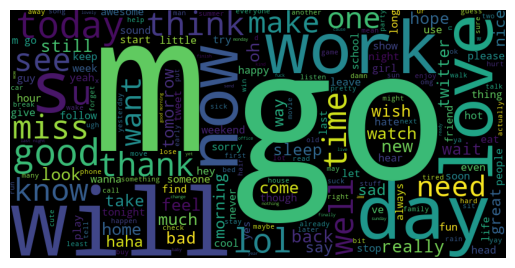

In [159]:
wc = WordCloud(width = 800,height = 400).generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()

# Spelling Correction

In [160]:
!pip install -U textblob

In [161]:
!python -m textblob.download_corpora

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\santh\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\santh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\santh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\santh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\santh\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\santh\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!

In [162]:
from textblob import TextBlob

In [163]:
x = 'thanks for visitsng here'

In [164]:
x = TextBlob(x).correct()

In [165]:
x

TextBlob("thanks for visiting here")

# Tokenization using TextBlob

In [166]:
x = 'thanks#watching this notebook. lets learn more on NLP'

In [167]:
TextBlob(x).words

WordList(['thanks', 'watching', 'this', 'notebook', 'lets', 'learn', 'more', 'on', 'NLP'])

In [168]:
# comparing with spacy tokenization

In [169]:
doc = nlp(x)
for token in doc:
    print(token)

thanks#watching
this
notebook
.
lets
learn
more
on
NLP


# Detecting Nouns

In [170]:
x = "Breaking news: Donal Trump, the president of the USA is looking to sign a deal to mine the moon"

In [171]:
doc = nlp(x)

In [172]:
for noun in doc.noun_chunks:
    print(noun)

Breaking news
Donal Trump
the president
the USA
a deal
the moon


# Language Translation and Detection

In [173]:
!pip install requests


In [174]:
import requests

# URL to make the GET request to
url = "https://www.loc.gov/standards/iso639-2/php/code_list.php"

try:
    # Send a GET request
    response = requests.get(url)

    # Check if the request was successful (HTTP status code 200)
    if response.status_code == 200:
        # Print the response content (assuming it's JSON)
        print("Response content:")
        print(response.json())
    else:
        print("HTTP request failed with status code:", response.status_code)

except requests.exceptions.RequestException as e:
    print("HTTP request failed:", e)


Response content:
HTTP request failed: Expecting value: line 1 column 1 (char 0)


In [175]:
x

'Breaking news: Donal Trump, the president of the USA is looking to sign a deal to mine the moon'

In [176]:
tb = TextBlob(x)

In [181]:
# tb.detect_language()

In [178]:
x

'Breaking news: Donal Trump, the president of the USA is looking to sign a deal to mine the moon'

In [180]:
# tb.translate(to = 'fr')

In [183]:
# def detect_language(text):
#     blob = TextBlob(text)
#     language = blob.detect_language()
#     return language

# # Example text for language detection
# text_for_detection = "Bonjour tout le monde"

# # Detect the language of the text
# detected_language = detect_language(text_for_detection)
# print("Detected Language:", detected_language)


In [185]:
from textblob.sentiments import NaiveBayesAnalyzer

In [186]:
x = 'we all stands together. we are gonna win this fight'

In [187]:
tb = TextBlob(x,analyzer = NaiveBayesAnalyzer())

In [188]:
tb.sentiment

Sentiment(classification='pos', p_pos=0.9180581552428241, p_neg=0.0819418447571765)